In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
import os
from keras.preprocessing import image

In [7]:
train_path='/kaggle/input/ocr-dnn-ensemble-dataset/data/dataset-4/data/training_data'
test_path='/kaggle/input/ocr-dnn-ensemble-dataset/data/dataset-4/data/testing_data'

In [8]:
image_classes=os.listdir(test_path)
image_classes

['N',
 '7',
 'R',
 '2',
 'B',
 'I',
 'F',
 'H',
 '5',
 'E',
 'U',
 'M',
 '8',
 'X',
 '0',
 'K',
 'Q',
 'Y',
 'S',
 'G',
 'A',
 'O',
 'T',
 'V',
 'Z',
 '3',
 '1',
 'C',
 '4',
 'P',
 '9',
 'L',
 '6',
 'W',
 'D',
 'J']

In [16]:
def plot_image(image_classes):
    plt.figure(figsize=(12,12))

    for i ,category in enumerate(image_classes[:25]):
        image_path=train_path+ '/' +category
        image_in_folder=os.listdir(image_path)

        first_image=image_in_folder[0]
        first_image_path=image_path+'/'+first_image

        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img)/255

        plt.subplot(5,5,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

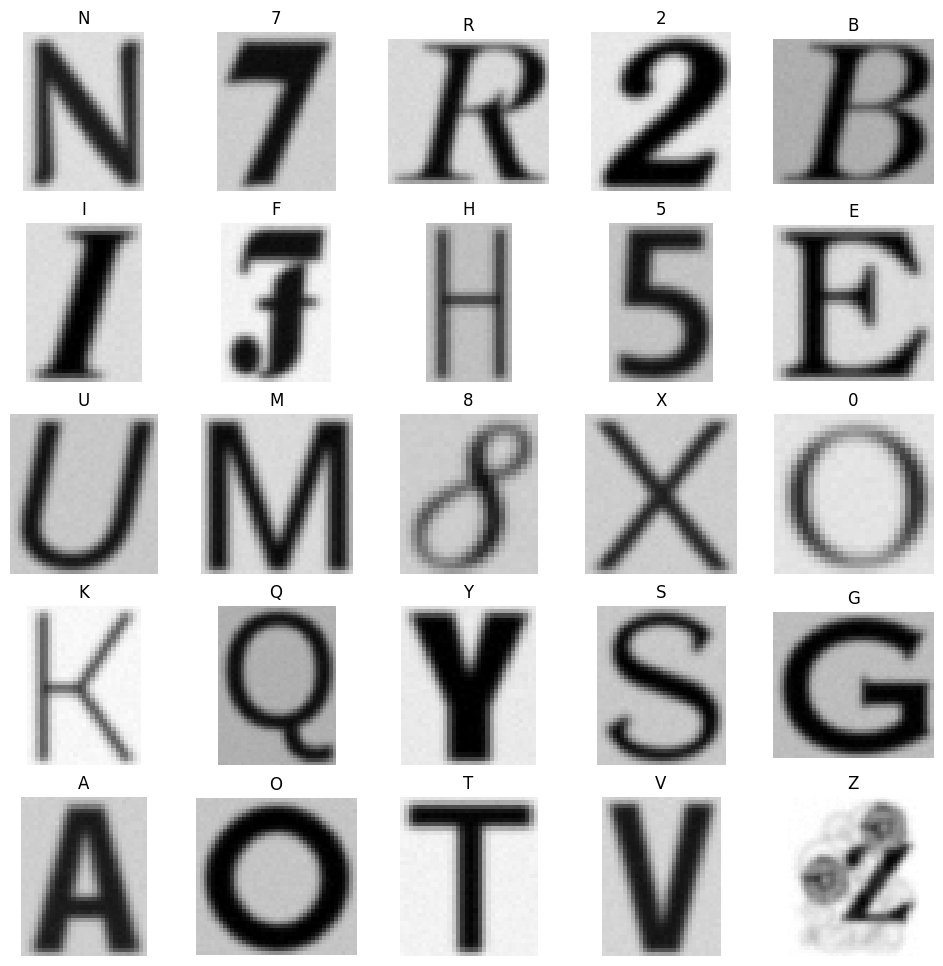

In [17]:
plot_image(image_classes)

In [19]:
image_generator=ImageDataGenerator(rescale=1/255)

In [20]:
train_data=image_generator.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='categorical')

Found 20628 images belonging to 36 classes.


In [21]:
test_data=image_generator.flow_from_directory(test_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1008 images belonging to 36 classes.


In [33]:
model=Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(150,150,3)),

    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),

    MaxPooling2D(),

    Flatten(),

    
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(36,activation='softmax')
    
])

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,255,524 (42.94 MB)

 Trainable params: 11,255,524 (42.94 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
model.fit(train_data,epochs=10)

Epoch 1/10


I0000 00:00:1760732828.770704     149 service.cc:148] XLA service 0x7fc688003290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760732828.771712     149 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760732828.771731     149 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760732829.086863     149 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/645 ━━━━━━━━━━━━━━━━━━━━ 1:06:15 6s/step - accuracy: 0.0000e+00 - loss: 3.5930

I0000 00:00:1760732832.285356     149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


645/645 ━━━━━━━━━━━━━━━━━━━━ 137s 203ms/step - accuracy: 0.6687 - loss: 1.3186
Epoch 2/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9440 - loss: 0.1933
Epoch 3/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9616 - loss: 0.1243
Epoch 4/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.9678 - loss: 0.0914
Epoch 5/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.9736 - loss: 0.0666
Epoch 6/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9768 - loss: 0.0641
Epoch 7/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9821 - loss: 0.0506
Epoch 8/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9811 - loss: 0.0507
Epoch 9/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9828 - loss: 0.0460
Epoch 10/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9845 - loss: 0.0440
